<a href="https://colab.research.google.com/github/Zeknous/Case-Based-2/blob/main/CaseBased2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import plotly.express as px

from sklearn.impute import SimpleImputer 
from sklearn.decomposition import PCA

#Data dibawah terdiri dari 167 rows dengan 10 column

In [393]:
df = pd.read_csv('https://github.com/Zeknous/Case-Based-2/blob/9a55fd6ae3ef3d442b4832d97250611cdcecb1c4/Archive/Country-data.csv?raw=true')
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [394]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [395]:
df_describe = df.describe()
df_describe

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#Preprocessing

Data akan diperiksa pada tahap ini agar bersih dan berguna untuk diproses.

##Min-Maxing data

In [396]:
def min_max_scaling(df) :
    return (df.iloc[:,1:10] - df.iloc[:,1:10].min()) / (df.iloc[:,1:10].max() - df.iloc[:,1:10].min())

In [397]:
df_scaling = min_max_scaling(df)
df_scaling.insert(0, "country", df['country'])
df_scaling

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,0.426485,0.049482,0.358608,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,Albania,0.068160,0.139531,0.294593,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,Algeria,0.120253,0.191559,0.146675,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,Angola,0.566699,0.311125,0.064636,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,Antigua and Barbuda,0.037488,0.227079,0.262275,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,0.129503,0.232582,0.213797,0.302609,0.018820,0.063118,0.609467,0.370662,0.026143
163,Venezuela,0.070594,0.142032,0.192666,0.100809,0.127750,0.463081,0.854043,0.208202,0.126650
164,Vietnam,0.100779,0.359651,0.312617,0.460715,0.031200,0.150725,0.808679,0.126183,0.010299
165,Yemen,0.261441,0.149536,0.209447,0.197397,0.031120,0.257000,0.698225,0.555205,0.010299


In [398]:
fix = df_scaling

In [399]:
print(df_scaling.columns)

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')


In [400]:
df_literal = pd.DataFrame()
df_literal['Country'] = df['country']
df_literal['Health'] = ((df['health']/df['health'].mean())
+(df['child_mort']/df['child_mort'].mean())
+(df['life_expec']/df['life_expec'].mean())+
(df['total_fer']/df['total_fer'].mean()))

df_literal['Economics'] = ((df['exports']/df['exports'].mean())
+(df['imports']/df['imports'].mean()))

df_literal['Moneter'] = ((df['income']/df['income'].mean())
+(df['gdpp']/df['gdpp'].mean())
+(df['inflation']/df['inflation'].mean()))

In [401]:
df_literal

,Country,Health,Economics,Moneter
0,Afghanistan,6.239852,1.200812,1.349645
1,Albania,3.035901,1.717580,1.471658
2,Algeria,3.389763,1.603752,3.165367
3,Angola,6.469020,2.430387,3.494919
4,Antigua and Barbuda,2.964898,2.362940,2.240150
...,...,...,...,...
162,Vanuatu,3.613452,2.257474,0.737840
163,Venezuela,3.073747,1.068624,7.902084
164,Vietnam,3.309933,3.461820,1.917840
165,Yemen,4.771970,1.463396,3.395058


In [402]:
df_literal_normalized = min_max_scaling(df_literal)

In [403]:
df_literal_normalized.insert(0, "country", df['country'])
df_literal_normalized

,country,Health,Economics,Moneter
0,Afghanistan,0.625740,0.139614,0.079820
1,Albania,0.127451,0.199901,0.088756
2,Algeria,0.182485,0.186622,0.212808
3,Angola,0.661381,0.283058,0.236946
4,Antigua and Barbuda,0.116409,0.275189,0.145043
...,...,...,...,...
162,Vanuatu,0.217274,0.262886,0.035009
163,Venezuela,0.133337,0.124193,0.559740
164,Vietnam,0.170070,0.403386,0.121436
165,Yemen,0.397451,0.170248,0.229632


##PCA

In [404]:
x = df_scaling.copy()
x.pop("country")

0              Afghanistan
1                  Albania
2                  Algeria
3                   Angola
4      Antigua and Barbuda
              ...         
162                Vanuatu
163              Venezuela
164                Vietnam
165                  Yemen
166                 Zambia
Name: country, Length: 167, dtype: object

In [405]:
pca = PCA()
pca_features = pca.fit_transform(x)

print('Shape before PCA: ', x.shape)
print('Shape after PCA: ', pca_features.shape)

_,n = pca_features.shape

columnsPCA = []
for i in range(1,n+1):
  colName = "PC"+str(i)
  columnsPCA.append(colName)
print(columnsPCA)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=columnsPCA)

Shape before PCA:  (167, 9)
Shape after PCA:  (167, 9)
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9']


In [406]:
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

In [407]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532,0.076803,0.040610,0.023572
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246,-0.043567,0.030842,0.029833
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988,-0.045604,-0.010198,0.003012
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170,-0.073985,-0.045195,-0.042241
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817,-0.009559,0.026228,0.022455
...,...,...,...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646,0.115254,-0.003232,-0.065701
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515,0.005521,0.056038,-0.036459
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237,-0.039743,-0.006124,-0.017780
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254,0.012519,0.014231,-0.011441


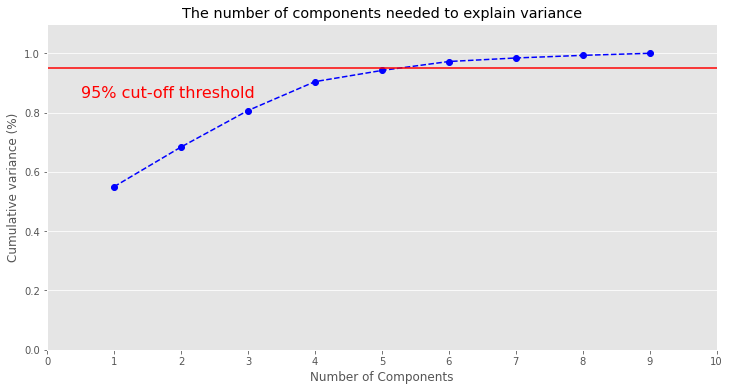

In [408]:
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, n+1, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

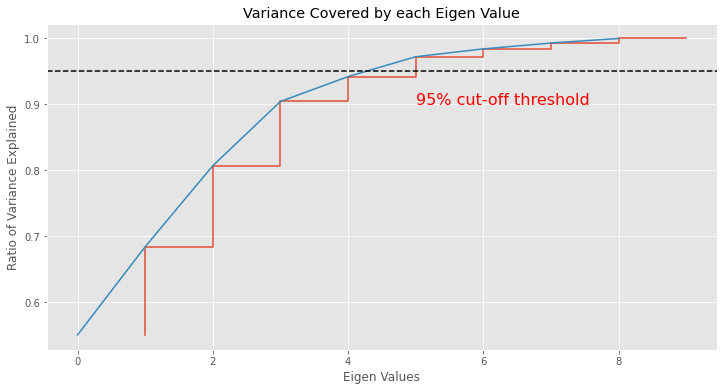

In [409]:
plt.step(list(range(1,n+1)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')

plt.axhline(y=0.95, color='black', linestyle='dashed')
plt.text(5, 0.90, '95% cut-off threshold', color = 'red', fontsize=16)

plt.show()

Text(0.5, 1.0, 'Scree Plot')

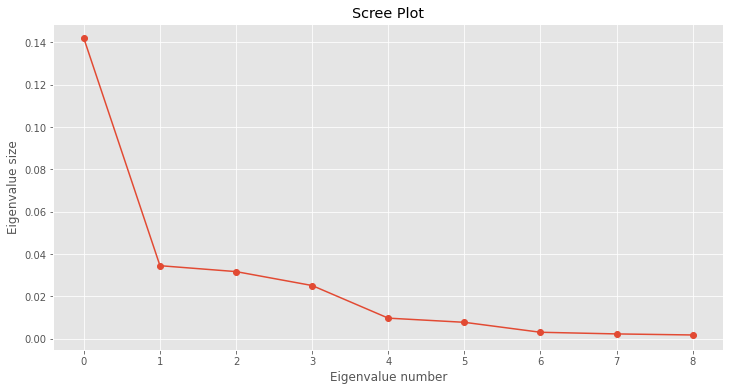

In [410]:
plt.style.use("ggplot") 
plt.plot(pca.explained_variance_, marker='o')
plt.xlabel("Eigenvalue number")
plt.ylabel("Eigenvalue size")
plt.title("Scree Plot")

In [411]:
pca = PCA(n_components=6)
pca_features = pca.fit_transform(x)

print('Shape before PCA: ', x.shape)
print('Shape after PCA: ', pca_features.shape)

_,n = pca_features.shape

columnsPCA = []
for i in range(1,n+1):
  colName = "PC"+str(i)
  columnsPCA.append(colName)
print(columnsPCA)

pca_df = pd.DataFrame(
    data=pca_features, 
    columns=columnsPCA)

Shape before PCA:  (167, 9)
Shape after PCA:  (167, 6)
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [412]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817
...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254


##Feature selection menggunakan correlation dan treshold 0.50

In [413]:
def select_feature(df, threshold):
    corr = set()
    cor_matrix = df.corr()
    for i in range(len(cor_matrix.columns)):
        for j in range(i):
            if abs(cor_matrix.iloc[i, j]) > threshold:
                colname = cor_matrix.columns[i]
                corr.add(colname)
    return corr

In [414]:
corr_features = select_feature(df, 0.50)
corr_features, len(corr_features)

({'gdpp', 'imports', 'income', 'life_expec', 'total_fer'}, 5)

In [415]:
df_selected = df[corr_features]

In [416]:
df_selected.insert(0, "country", df['country'])

In [417]:
df_selected

,country,total_fer,imports,life_expec,income,gdpp
0,Afghanistan,5.82,44.9,56.2,1610,553
1,Albania,1.65,48.6,76.3,9930,4090
2,Algeria,2.89,31.4,76.5,12900,4460
3,Angola,6.16,42.9,60.1,5900,3530
4,Antigua and Barbuda,2.13,58.9,76.8,19100,12200
...,...,...,...,...,...,...
162,Vanuatu,3.50,52.7,63.0,2950,2970
163,Venezuela,2.47,17.6,75.4,16500,13500
164,Vietnam,1.95,80.2,73.1,4490,1310
165,Yemen,4.67,34.4,67.5,4480,1310


In [418]:
df_selected_normalized = min_max_scaling(df_selected)

In [419]:
df_selected_normalized

,total_fer,imports,life_expec,income,gdpp
0,0.736593,0.257765,0.475345,0.008047,0.003073
1,0.078864,0.279037,0.871795,0.074933,0.036833
2,0.274448,0.180149,0.875740,0.098809,0.040365
3,0.790221,0.246266,0.552268,0.042535,0.031488
4,0.154574,0.338255,0.881657,0.148652,0.114242
...,...,...,...,...,...
162,0.370662,0.302609,0.609467,0.018820,0.026143
163,0.208202,0.100809,0.854043,0.127750,0.126650
164,0.126183,0.460715,0.808679,0.031200,0.010299
165,0.555205,0.197397,0.698225,0.031120,0.010299


In [420]:
df_selected_normalized.insert(0, "country", df['country'])
df_selected_normalized

,country,total_fer,imports,life_expec,income,gdpp
0,Afghanistan,0.736593,0.257765,0.475345,0.008047,0.003073
1,Albania,0.078864,0.279037,0.871795,0.074933,0.036833
2,Algeria,0.274448,0.180149,0.875740,0.098809,0.040365
3,Angola,0.790221,0.246266,0.552268,0.042535,0.031488
4,Antigua and Barbuda,0.154574,0.338255,0.881657,0.148652,0.114242
...,...,...,...,...,...,...
162,Vanuatu,0.370662,0.302609,0.609467,0.018820,0.026143
163,Venezuela,0.208202,0.100809,0.854043,0.127750,0.126650
164,Vietnam,0.126183,0.460715,0.808679,0.031200,0.010299
165,Yemen,0.555205,0.197397,0.698225,0.031120,0.010299


##Mengecek duplikasi data

In [421]:
df_duplicated = df.duplicated()
df_duplicated.sum()

0

##Mengecek data kosong

In [422]:
df.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

#Menggunakan method K-means

##Centroid awalan

In [423]:
def random_centroid(k, n, df):
  df_copy = df.copy()
  if 'country' in df:
    df_copy.pop('country')
  # k adalah banyaknya kluster
  # n adalah banyaknya fitur
  return pd.DataFrame(np.random.rand(n,k),index = [i for i in df_copy])

In [424]:
print(random_centroid(3,9,df_scaling))

                   0         1         2
child_mort  0.334193  0.949881  0.885673
exports     0.495236  0.509331  0.595826
health      0.609136  0.326061  0.336074
imports     0.759978  0.243968  0.019793
income      0.221995  0.882904  0.882535
inflation   0.553384  0.954642  0.328549
life_expec  0.036014  0.003552  0.344389
total_fer   0.561026  0.633589  0.894810
gdpp        0.580170  0.812425  0.153488


##Perhitungan jarak dan pengelompokan

In [425]:
df_test = df_scaling.copy()

In [426]:
def set_class(data, data_centroids):
  distances = data_centroids.apply(lambda x: np.sqrt(((data - x)**2).sum(axis=1)))
  return distances.idxmin(axis=1)

##Update nilai cetroid terbaru

In [427]:
def set_new_centroids(df, labels):
  return df.groupby(labels).apply(lambda x : np.exp(np.log(x).mean())).T 

##Plot

In [428]:
def plot(df, label, centroid, iterasi):
    pca = PCA(n_components=2)
    df_2d = pca.fit_transform(df)
    centroid_2d = pca.fit_transform(centroid.T)
    plt.title(f'Iterasi ke {iterasi}')

    plt.scatter(x = df_2d[:,0], y = df_2d[:,1], c = label)
    plt.scatter(x = centroid_2d[:,0], y = centroid_2d[:,1])
    plt.show()

In [429]:
def deleteFirstColumn(df):
  return df.iloc[:,1:]

#Main Program

##Pemilihan dataset yang digunakan

In [430]:
_, n = df_scaling.shape
print(n)

10


In [431]:
def k_means1(df):
  df_asli = df.copy()
  df_asli_tanpa_country = df.copy()
  if 'country' in df_asli_tanpa_country.columns:
    df_asli_tanpa_country.pop('country')
    _, n = df_asli_tanpa_country.shape
  
  max_iterations = 100
  k = 3
  centroids = random_centroid(k,n,df_asli)
  old_centroids = pd.DataFrame()

  iteration = 1
  while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = set_class(df_asli_tanpa_country, centroids)
    centroids = set_new_centroids(df_asli_tanpa_country, labels)
    plot(df_asli_tanpa_country, labels, centroids, iteration)
    iteration += 1
  return labels

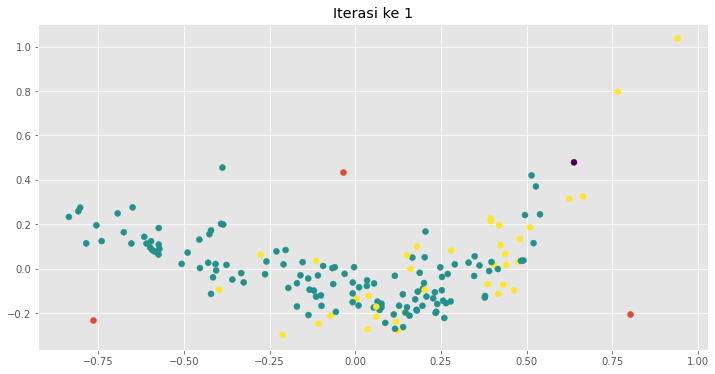

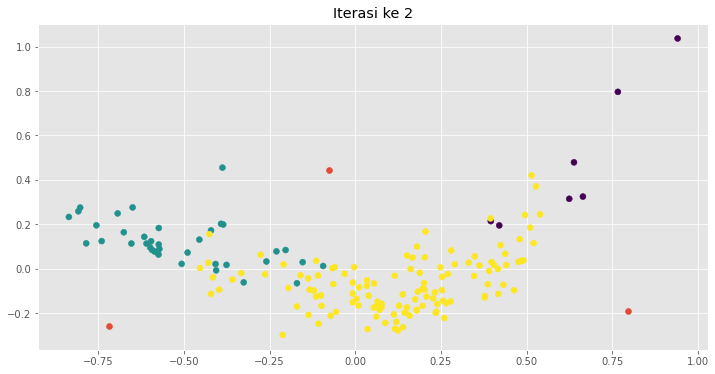

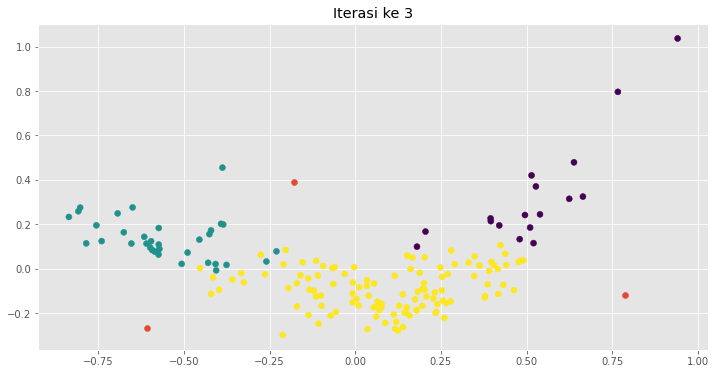

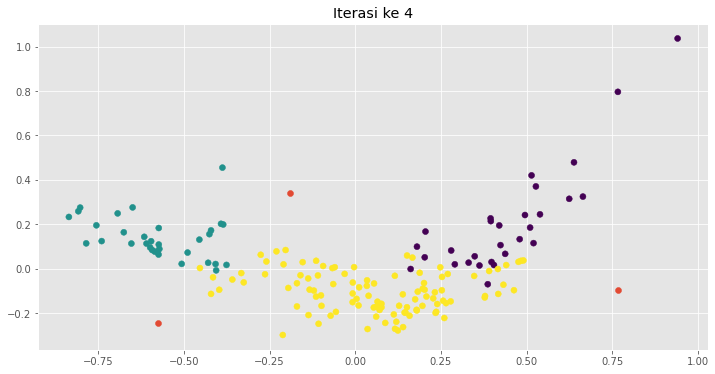

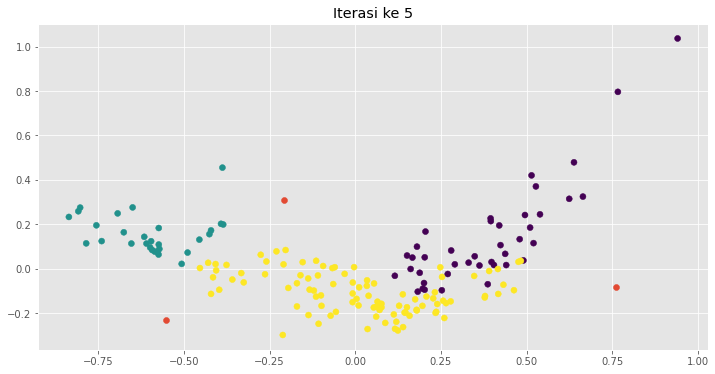

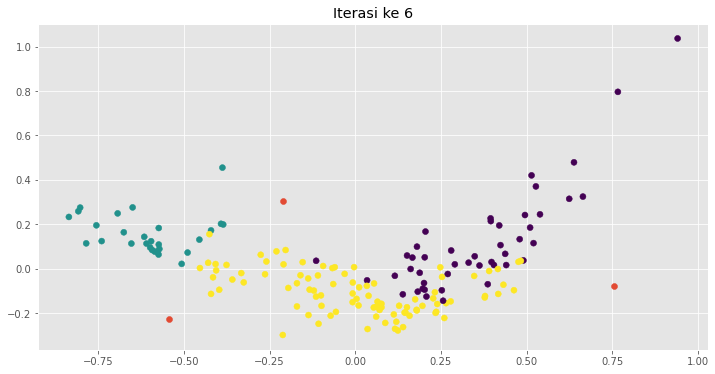

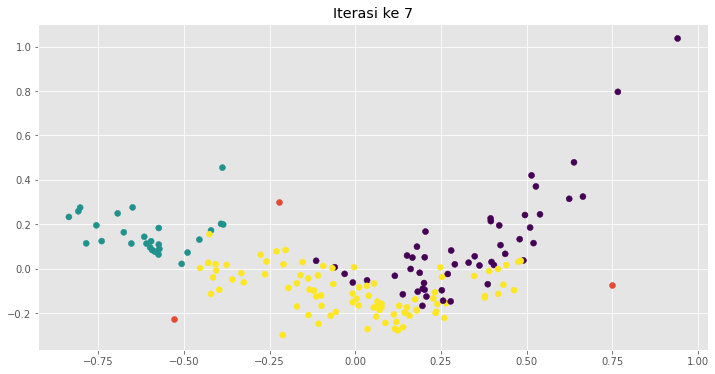

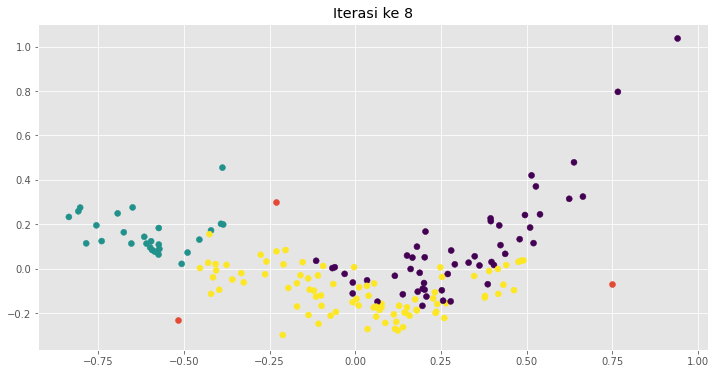

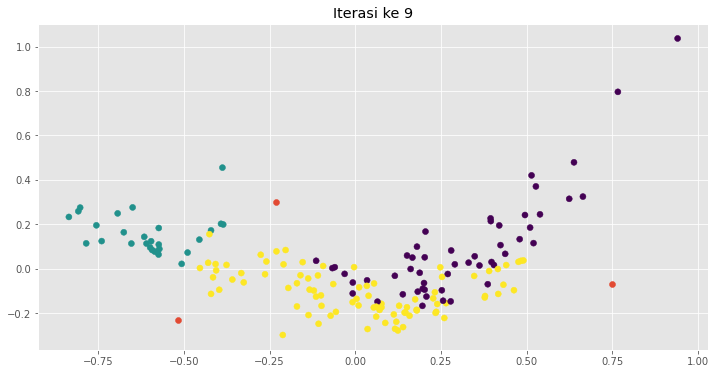

In [432]:
labels_normalized = k_means1(df_scaling)

In [433]:
labels_normalized.value_counts()

2    87
0    52
1    28
dtype: int64

In [434]:
df_selected_normalized

,country,total_fer,imports,life_expec,income,gdpp
0,Afghanistan,0.736593,0.257765,0.475345,0.008047,0.003073
1,Albania,0.078864,0.279037,0.871795,0.074933,0.036833
2,Algeria,0.274448,0.180149,0.875740,0.098809,0.040365
3,Angola,0.790221,0.246266,0.552268,0.042535,0.031488
4,Antigua and Barbuda,0.154574,0.338255,0.881657,0.148652,0.114242
...,...,...,...,...,...,...
162,Vanuatu,0.370662,0.302609,0.609467,0.018820,0.026143
163,Venezuela,0.208202,0.100809,0.854043,0.127750,0.126650
164,Vietnam,0.126183,0.460715,0.808679,0.031200,0.010299
165,Yemen,0.555205,0.197397,0.698225,0.031120,0.010299


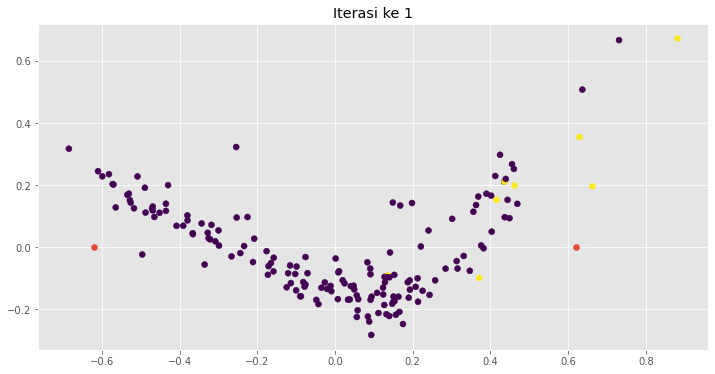

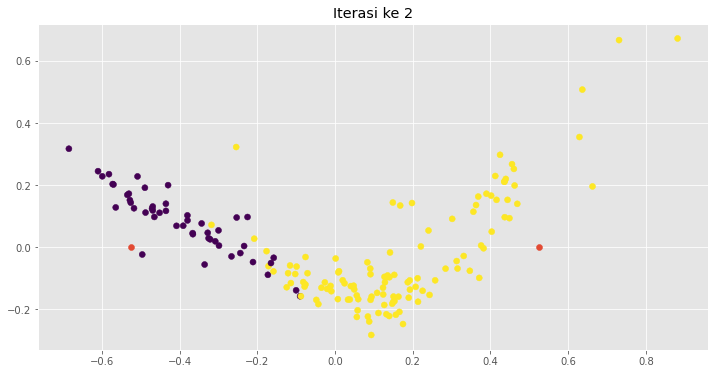

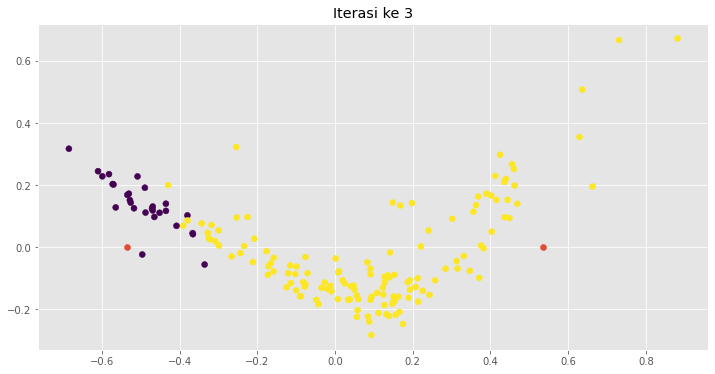

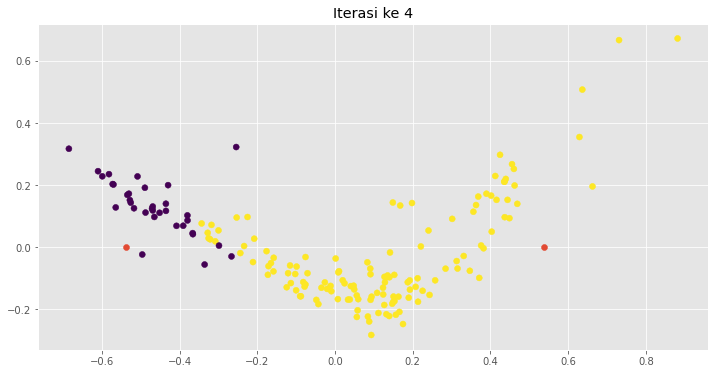

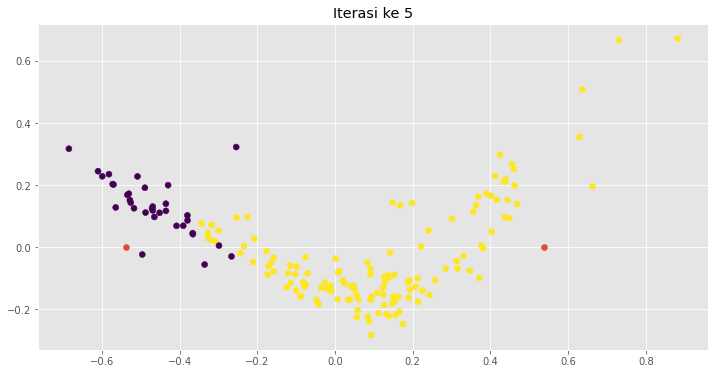

In [435]:
labels_feature_selected = k_means1(df_selected_normalized)

In [436]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6
0,-0.599078,0.095490,0.157554,-0.024333,-0.045618,-0.046532
1,0.158474,-0.212092,-0.064189,-0.061247,0.014191,-0.010246
2,0.003686,-0.135867,-0.134182,0.133574,-0.091150,0.025988
3,-0.650235,0.275975,-0.142672,0.156018,-0.081997,0.032170
4,0.200711,-0.064662,-0.100715,-0.037902,-0.035799,-0.055817
...,...,...,...,...,...,...
162,-0.160078,-0.029625,-0.121910,-0.066099,-0.009043,-0.063646
163,0.061133,-0.171339,-0.058586,0.247460,-0.093260,0.291515
164,0.115512,-0.032034,-0.195243,-0.231993,-0.035734,0.089237
165,-0.332968,-0.019824,-0.029989,0.105416,-0.141550,0.063254


In [437]:
pca_df.insert(0, "country", df['country'])

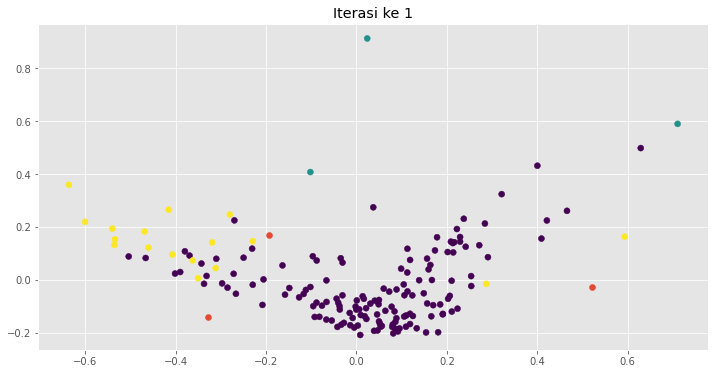

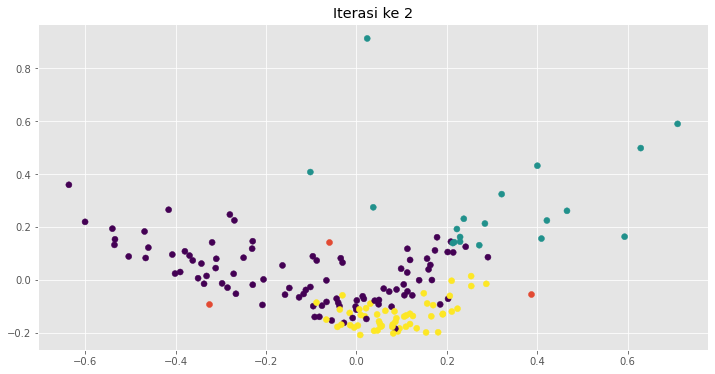

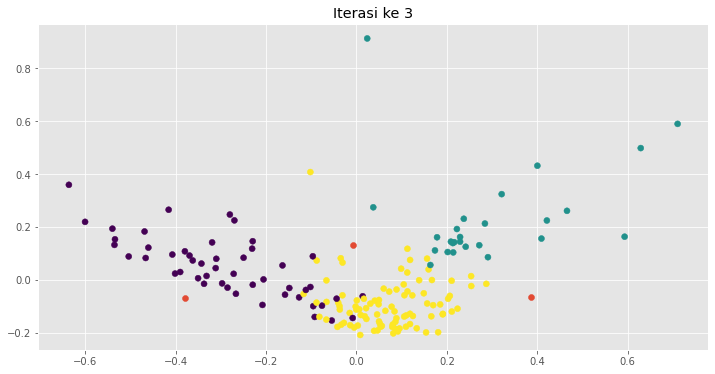

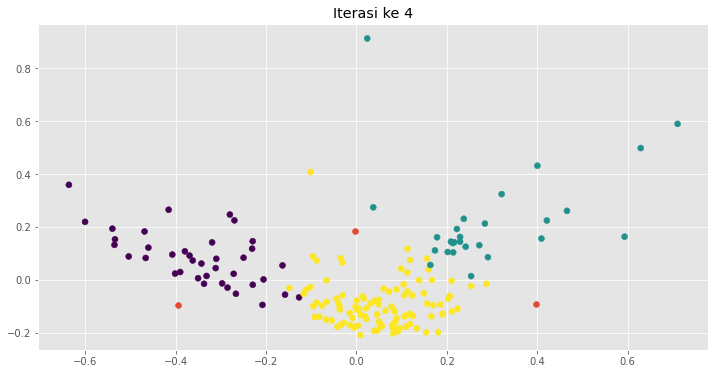

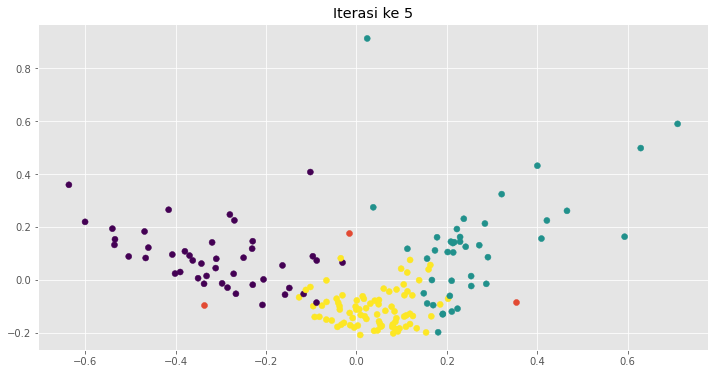

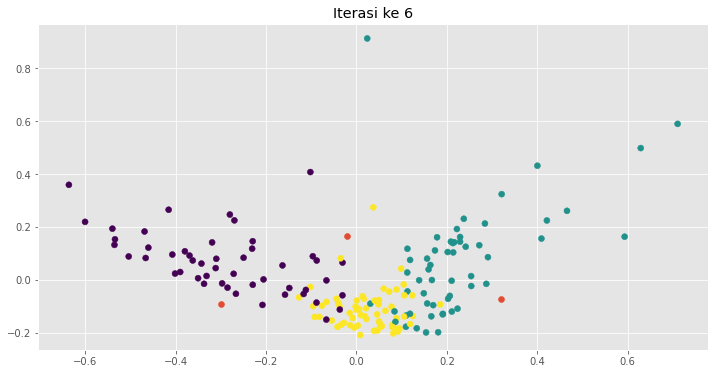

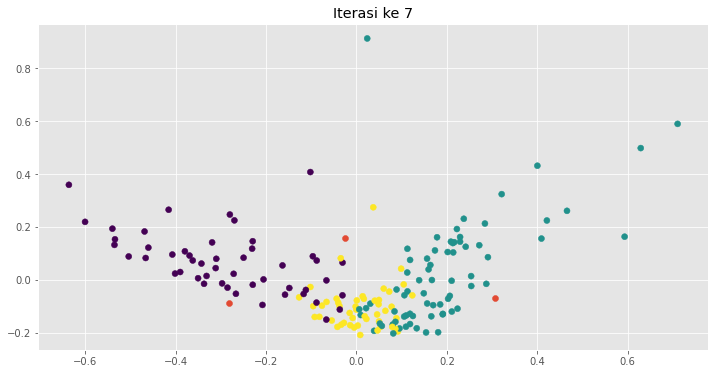

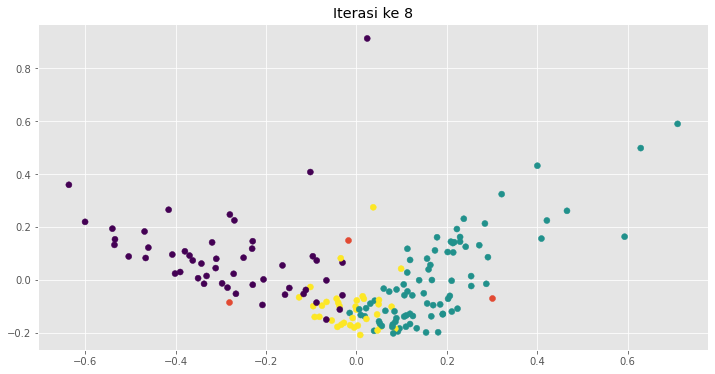

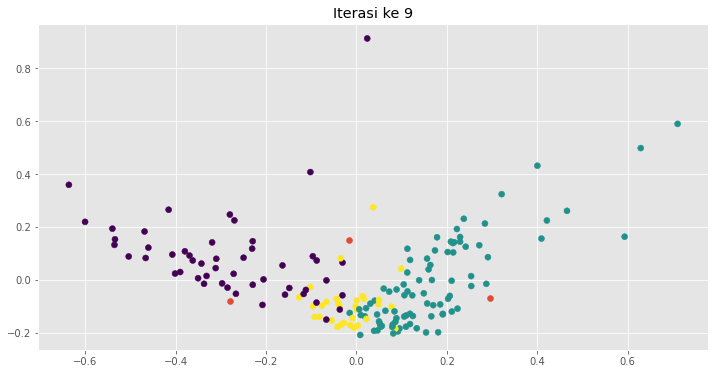

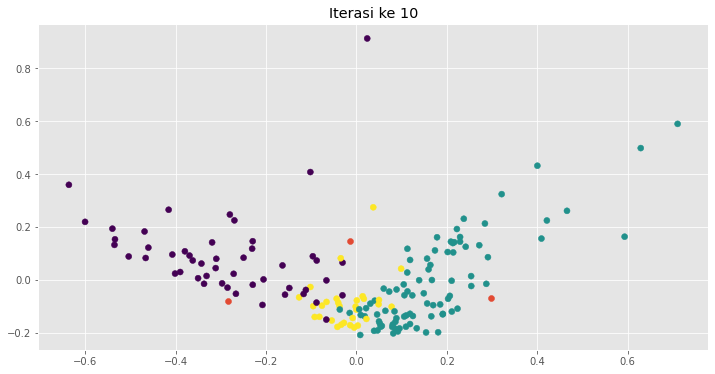

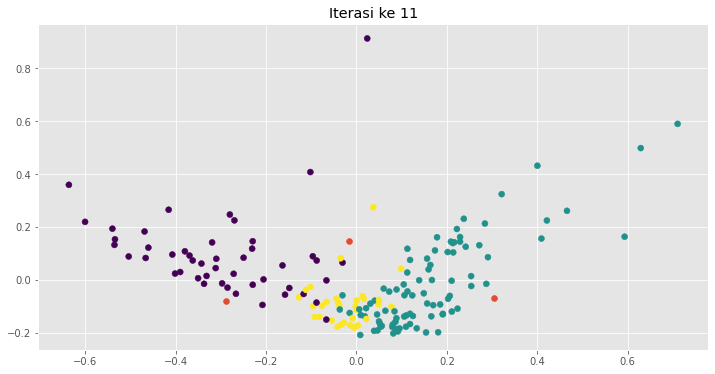

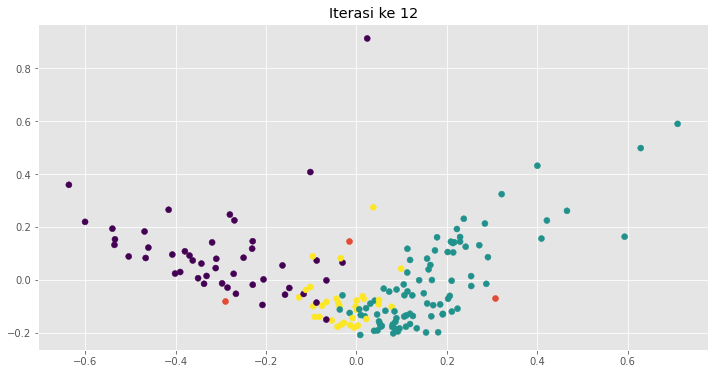

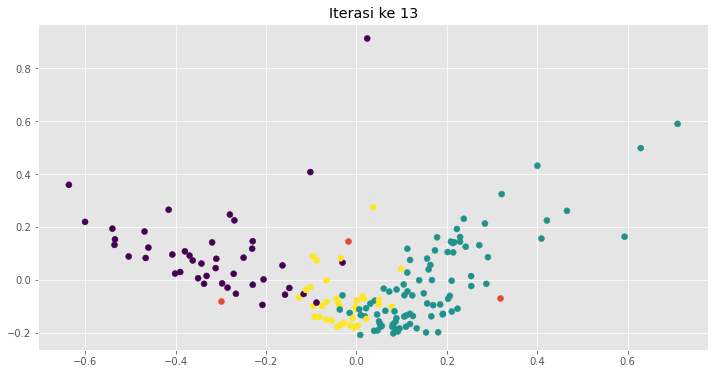

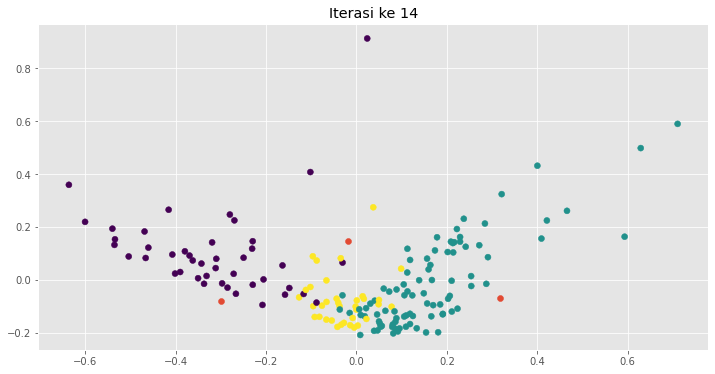

In [438]:
labels_literal = k_means1(df_literal_normalized)

In [439]:
def plot_negara(df_plot,labels):
  df_plot['Class'] = labels

  df_plot['Class'].loc[df_plot['Class'] == 0] = 'Class 1'
  df_plot['Class'].loc[df_plot['Class'] == 1] = 'Class 2'
  df_plot['Class'].loc[df_plot['Class'] == 2] = 'Class 3'

  fig = px.choropleth(df_plot[['country','Class']],
                      locationmode = 'country names',
                      locations = 'country',
                      title = 'Pembagian',
                      color = df_plot['Class'],  
                      color_discrete_map = {'Class 2':'Red',
                                            'Class 1':'Yellow',
                                            'Class 3': 'Green'})
  fig.update_geos(fitbounds = "locations", visible = True)
  fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
  fig.show(engine = 'kaleido')

In [440]:
plot_negara(df_scaling,labels_normalized)

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [441]:
plot_negara(pca_df,labels_pca)

In [442]:
plot_negara(df_selected,labels_feature_selected)

<ipython-input-439-0c798d0d4772>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1965: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [443]:
plot_negara(df_literal_normalized,labels_literal)

In [444]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [445]:
def evaluate(df):
  df_test = df.copy()
  sse = {};sil = [];kmax = 10
  fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

  if 'Class' in df_test.columns:
    df_test.pop('Class')
  if 'country' in df_test.columns:
    df_test.pop('country')

  # Elbow Method :
  plt.subplot(1,2,1)
  for k in range(1, 10):
      kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df_test)
      sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
  sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
  plt.title('Elbow Method')
  plt.xlabel("k : Number of cluster")
  plt.ylabel("Sum of Squared Error")
  plt.grid()

  # Silhouette Score Method
  plt.subplot(1,2,2)
  for k in range(2, kmax + 1):
      kmeans = KMeans(n_clusters = k).fit(df_test)
      labels = kmeans.labels_
      sil.append(silhouette_score(df_test, labels, metric = 'euclidean'))
  sns.lineplot(x = range(2,kmax + 1), y = sil);
  plt.title('Silhouette Score Method')
  plt.xlabel("k : Number of cluster")
  plt.ylabel("Silhouette Score")
  plt.grid()

  plt.show()

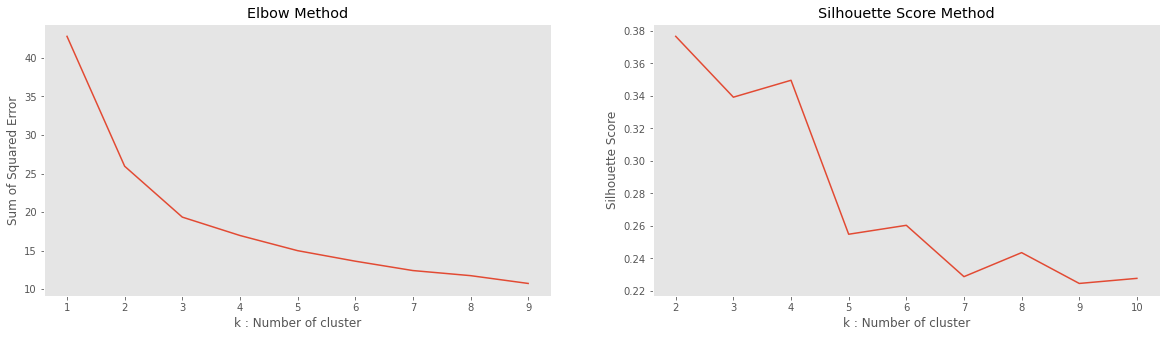

In [446]:
evaluate(df_scaling)

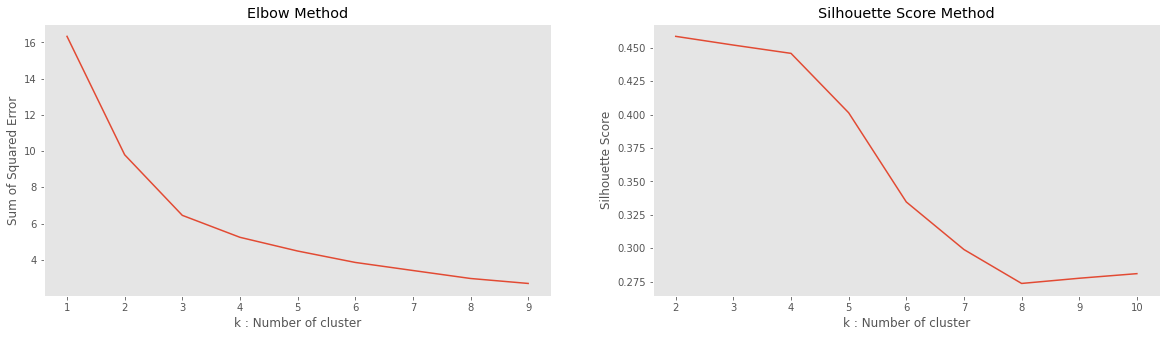

In [447]:
evaluate(df_literal_normalized)

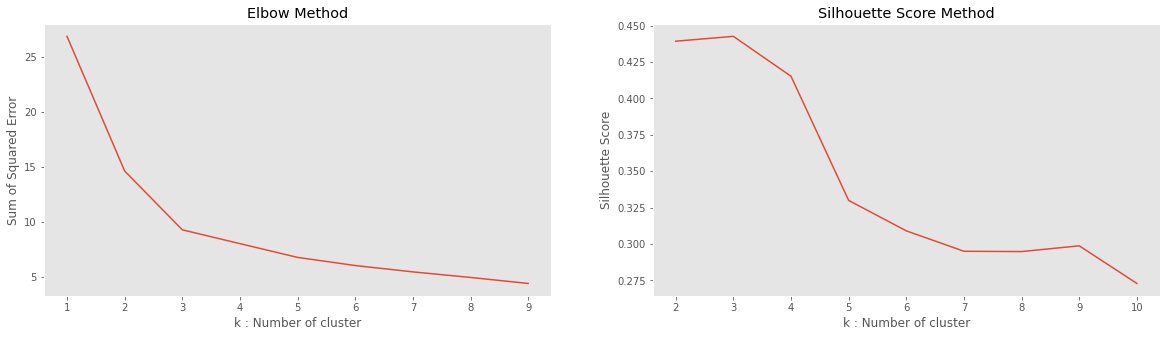

In [448]:
evaluate(df_selected_normalized)

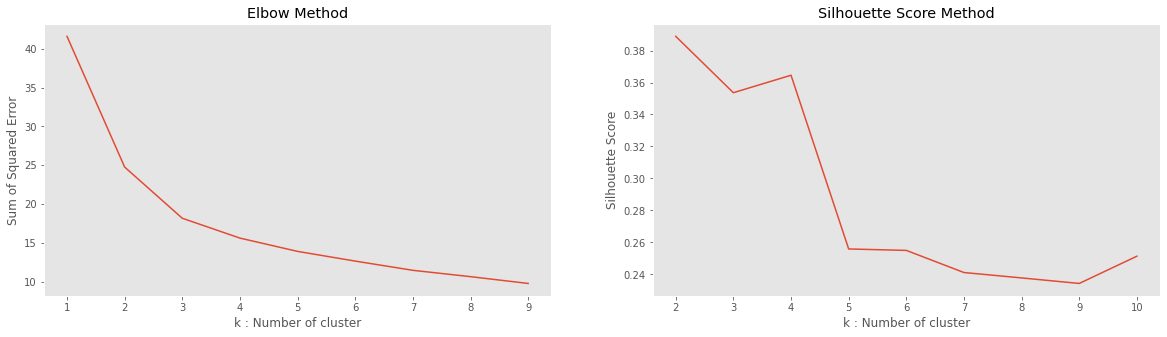

In [449]:
evaluate(pca_df)